Reworked the following:
   
    https://github.com/ryval/VASP/blob/master/readDOSCAR.py

To show 1, 2...


# Filename: DOSCAR
# Folder: LaCo2In
# Max Energy: 26.2139 eV
# Min Energy: -12.8876 eV
# Fermi Energy: 5.3359 eV
# 1001 points calculated

# Filename: DOSCAR
# Folder: GdCo2In
# Max Energy: 32.8265 eV
# Min Energy: -17.4658 eV
# Fermi Energy: 6.4129 eV
# 1001 points calculated



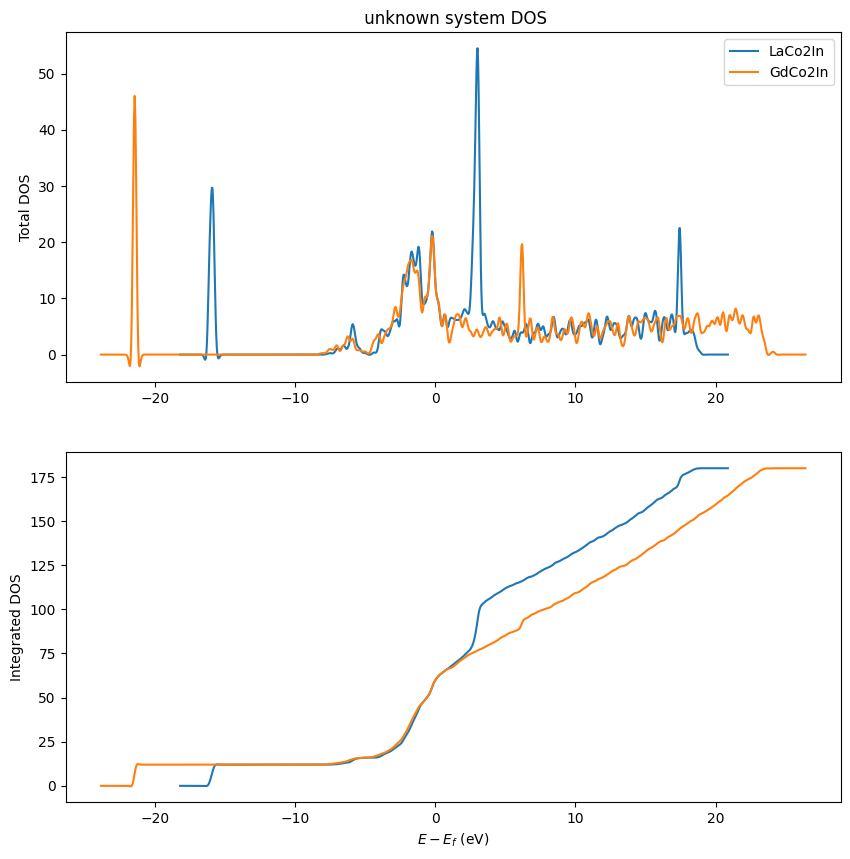

In [145]:
import os
import matplotlib.pyplot as plt

def readDOSCAR(filename, folder_name):
    doscar = open(filename, "r")

    doscar.readline()  # Skip file header
    doscar.readline()
    doscar.readline()
    doscar.readline()

    name = doscar.readline().rstrip()

    first = doscar.readline()
    (emax, emin, ndos, efermi, weight) = first.split()

    print("# Filename:", os.path.basename(filename))  # Print filename
    print("# Folder:", folder_name)  # Print folder name
    print("# Max Energy: %.4f eV" % float(emax))
    print("# Min Energy: %.4f eV" % float(emin))
    print("# Fermi Energy: %.4f eV" % float(efermi))
    print("#", ndos, "points calculated")
    print()

    es = []
    tds = []
    ids = []

    for i in range(int(ndos)):
        line = doscar.readline()
        (energy, tdos, idos) = line.split()

        try:
            energy = float(energy)
            tdos = float(tdos)
            idos = float(idos)
        except ValueError:
            continue

        tds.append(tdos)
        es.append(energy - float(efermi))
        ids.append(idos)

    plt.subplot(2, 1, 1)
    plt.plot(es, tds, '-', label=folder_name)  # Use folder name as the label
    plt.ylabel('Total DOS')

    plt.subplot(2, 1, 2)
    plt.plot(es, ids, '-')
    plt.ylabel('Integrated DOS')

    plt.xlabel(r'$E - E_f$ (eV)')
    plt.subplot(2, 1, 1)
    plt.title(name + " DOS")
    plt.legend()

def main(filenames):
    """
    readDOSCAR.py is used to generate plots of the total 
    and integrated density of states calculated using VASP.  
    It can be passed a list of filenames.

    Example usage:
    main(['DOSCAR1', 'DOSCAR2', 'DOSCAR3'])
    """

    print()
    plt.figure('Density of States', figsize=(10, 10))

    for filename in filenames:
        folder_name = os.path.basename(os.path.dirname(filename))  # Extract parent folder name
        readDOSCAR(filename, folder_name)

# Example usage:
main(['Desktop/Molecules/LaCo2In/DOSCAR', 'Desktop/Molecules/GdCo2In/DOSCAR'])  # Adjust filenames as needed

To show all, save one graph:

# Filename: DOSCAR
# Folder: LaCo2In
# Max Energy: 26.2139 eV
# Min Energy: -12.8876 eV
# Fermi Energy: 5.3359 eV
# 1001 points calculated


# Filename: DOSCAR
# Folder: GdCo2In
# Max Energy: 32.8265 eV
# Min Energy: -17.4658 eV
# Fermi Energy: 6.4129 eV
# 1001 points calculated


# Filename: DOSCAR
# Folder: PrCo2In
# Max Energy: 32.7787 eV
# Min Energy: -32.5485 eV
# Fermi Energy: 6.2931 eV
# 1001 points calculated


# Filename: DOSCAR
# Folder: CeCo2In
# Max Energy: 28.7546 eV
# Min Energy: -29.6541 eV
# Fermi Energy: 7.5280 eV
# 1001 points calculated


# Filename: DOSCAR
# Folder: SmCo2In
# Max Energy: 33.3447 eV
# Min Energy: -37.6007 eV
# Fermi Energy: 6.2052 eV
# 1001 points calculated


# Filename: DOSCAR
# Folder: EuCo2In
# Max Energy: 33.1782 eV
# Min Energy: -16.9658 eV
# Fermi Energy: 6.2219 eV
# 1001 points calculated


# Filename: DOSCAR
# Folder: NdCo2In
# Max Energy: 33.0197 eV
# Min Energy: -34.2015 eV
# Fermi Energy: 6.2854 eV
# 1001 points calculated


# Filename: D

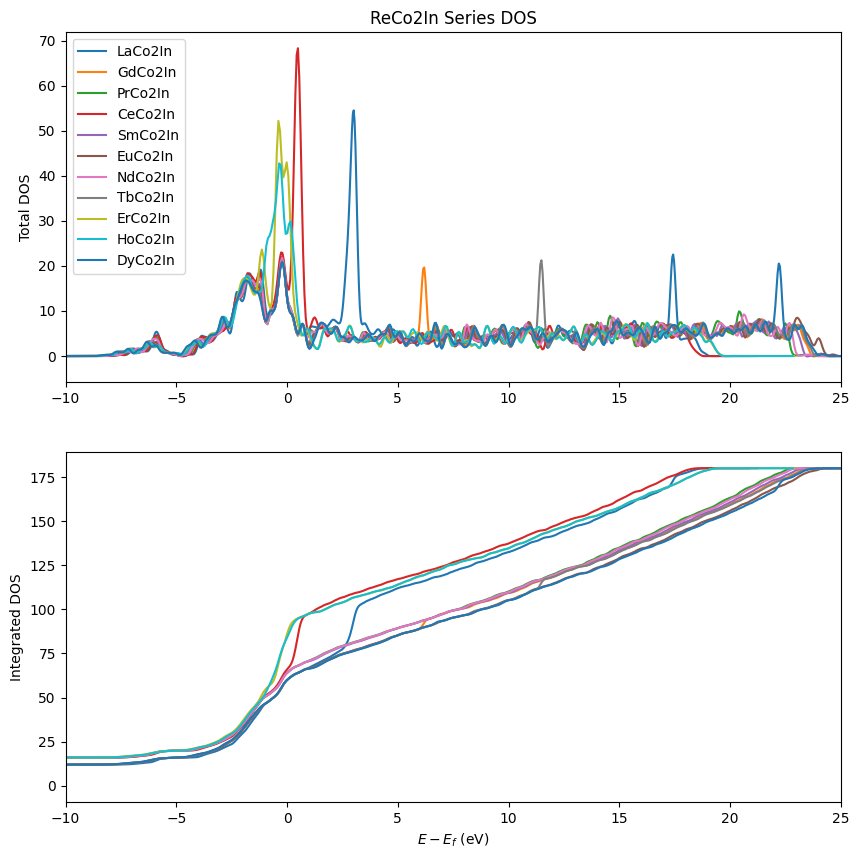

In [146]:
import os
import glob
import matplotlib.pyplot as plt

def readDOSCAR(filename, folder_name):
    doscar = open(filename, "r")

    doscar.readline()  # Skip file header
    doscar.readline()
    doscar.readline()
    doscar.readline()

    name = doscar.readline().rstrip()

    first = doscar.readline()
    (emax, emin, ndos, efermi, weight) = first.split()

    es = []
    tds = []
    ids = []

    print("# Filename:", os.path.basename(filename))
    print("# Folder:", folder_name)
    print("# Max Energy: %.4f eV" % float(emax))
    print("# Min Energy: %.4f eV" % float(emin))
    print("# Fermi Energy: %.4f eV" % float(efermi))
    print("#", ndos, "points calculated")
    print()

    for i in range(int(ndos)):
        line = doscar.readline()
        (energy, tdos, idos) = line.split()

        try:
            energy = float(energy)
            tdos = float(tdos)
            idos = float(idos)
        except ValueError:
            continue

        tds.append(tdos)
        es.append(energy - float(efermi))
        ids.append(idos)

    plt.subplot(2, 1, 1)
    plt.plot(es, tds, '-', label=folder_name)  # Use folder name as the label
    plt.ylabel('Total DOS')
    plt.xlim(-10, 25)  # Set the x-axis limits... adjust as needed

    plt.subplot(2, 1, 2)
    plt.plot(es, ids, '-')
    plt.ylabel('Integrated DOS')
    plt.xlim(-10, 25)

    plt.xlabel(r'$E - E_f$ (eV)')
    plt.subplot(2, 1, 1)
    plt.title("ReCo2In Series DOS")
    plt.legend()

def main(directory):

    plt.figure('Density of States', figsize=(10, 10))  # Moved this line outside the loop

    # Use glob to find all files ending with "DOSCAR" in the specified directory
    doscar_files = glob.glob(os.path.join(directory, '**', '*DOSCAR'), recursive=True)
    doscar_files = [f for f in doscar_files if "ispin=2" not in f and "Not_Using" not in f]

    if not doscar_files:
        print("No DOSCAR files found in the specified directory or its subdirectories.")
        return

    for filename in doscar_files:
        folder_name = os.path.basename(os.path.dirname(filename))  # Extract parent folder name
        readDOSCAR(filename, folder_name)
        print()  # Add an empty line between each block of information

        # Save the plot as PNG
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Molecules/Graphs/DOS', 'Miriad.png')
    plt.savefig(output_filename)
    plt.show()  # Display the plot
    plt.close()  # Close the figure to free up memory

main('Desktop/Molecules')

To show all, save as separate graphs:

# Filename: DOSCAR
# Folder: LaCo2In
# Max Energy: 26.2139 eV
# Min Energy: -12.8876 eV
# Fermi Energy: 5.3359 eV
# 1001 points calculated



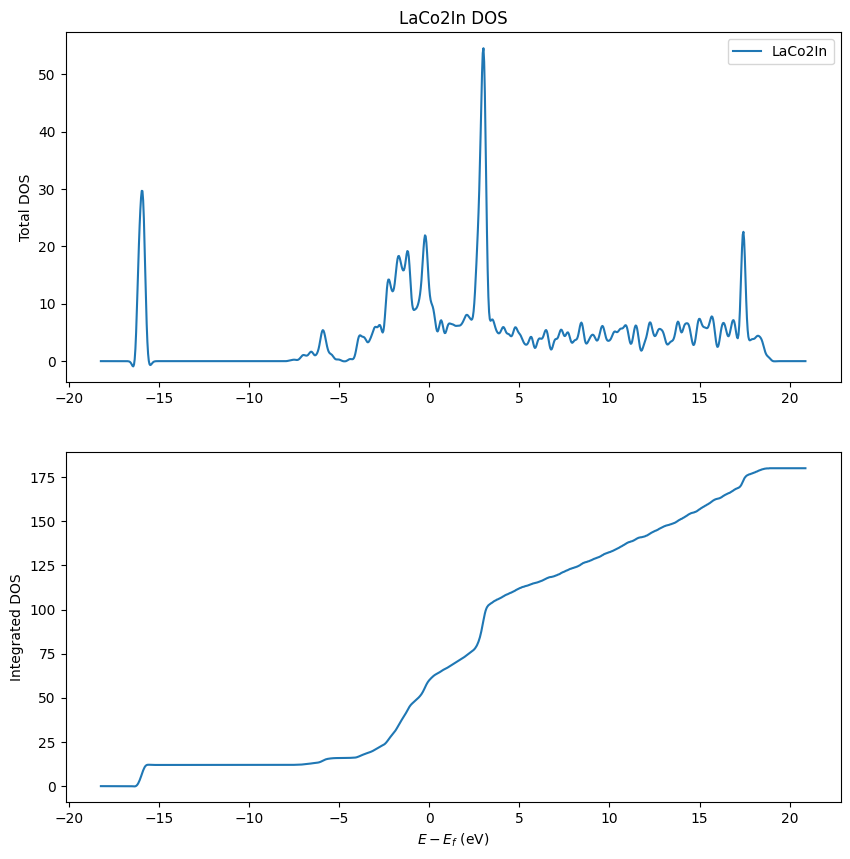


# Filename: DOSCAR
# Folder: GdCo2In
# Max Energy: 32.8265 eV
# Min Energy: -17.4658 eV
# Fermi Energy: 6.4129 eV
# 1001 points calculated



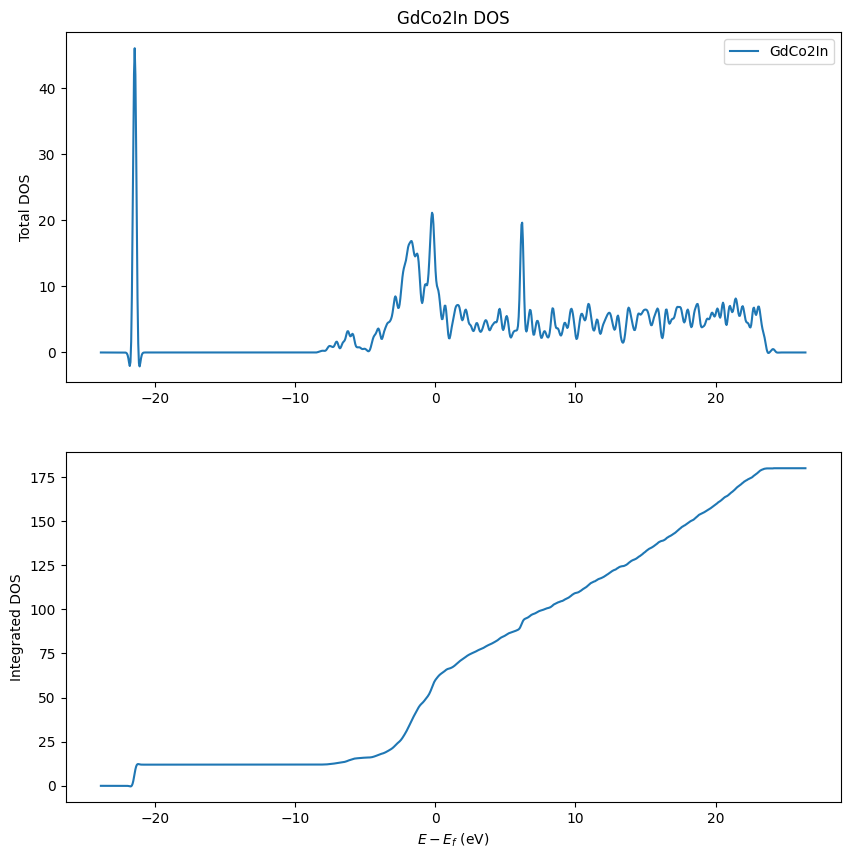


# Filename: DOSCAR
# Folder: PrCo2In
# Max Energy: 32.7787 eV
# Min Energy: -32.5485 eV
# Fermi Energy: 6.2931 eV
# 1001 points calculated



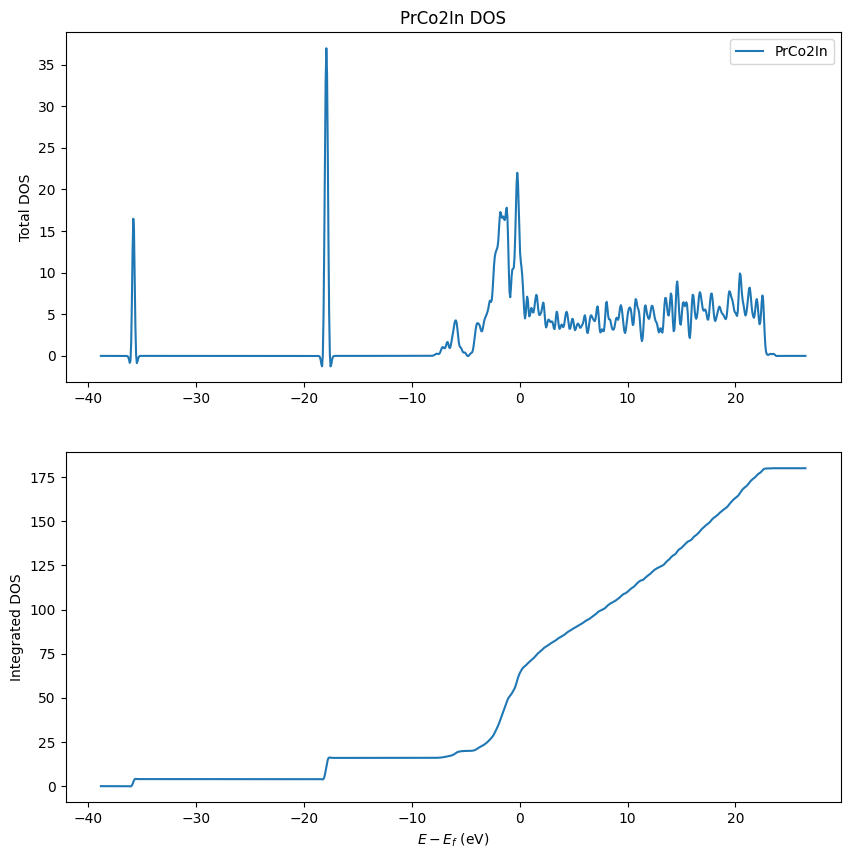


# Filename: DOSCAR
# Folder: CeCo2In
# Max Energy: 28.7546 eV
# Min Energy: -29.6541 eV
# Fermi Energy: 7.5280 eV
# 1001 points calculated



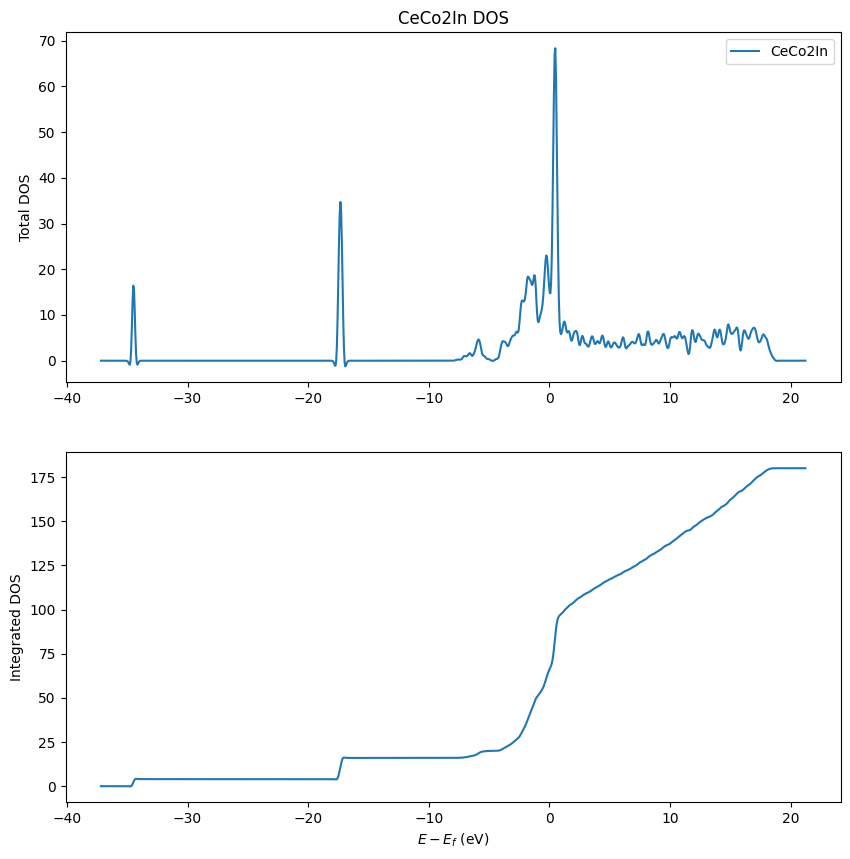


# Filename: DOSCAR
# Folder: SmCo2In
# Max Energy: 33.3447 eV
# Min Energy: -37.6007 eV
# Fermi Energy: 6.2052 eV
# 1001 points calculated



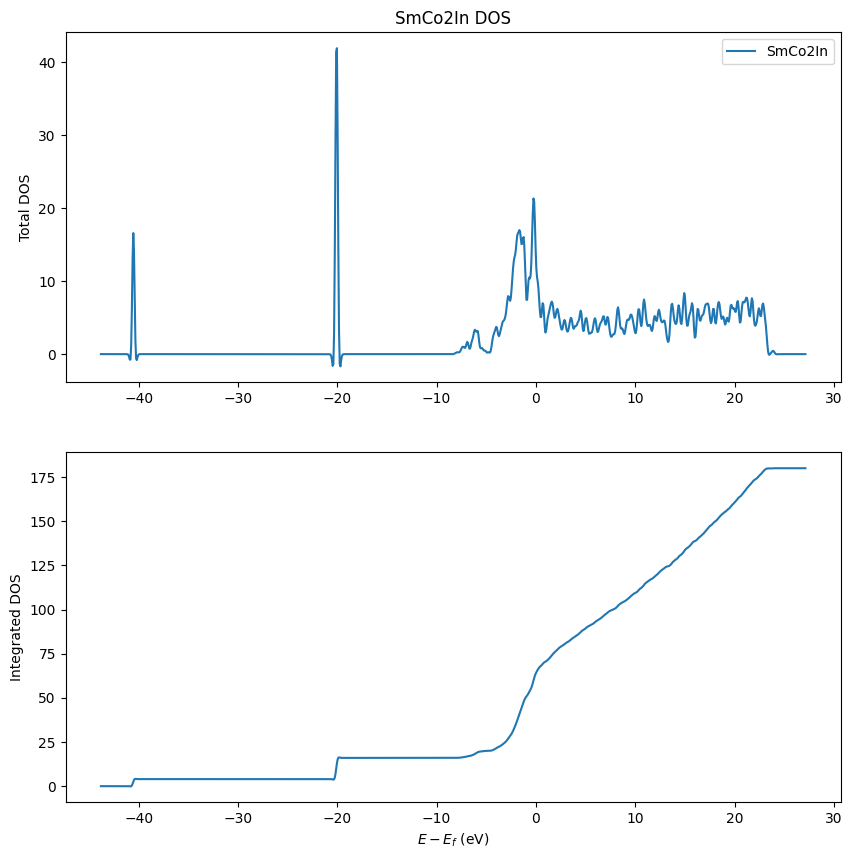


# Filename: DOSCAR
# Folder: EuCo2In
# Max Energy: 33.1782 eV
# Min Energy: -16.9658 eV
# Fermi Energy: 6.2219 eV
# 1001 points calculated



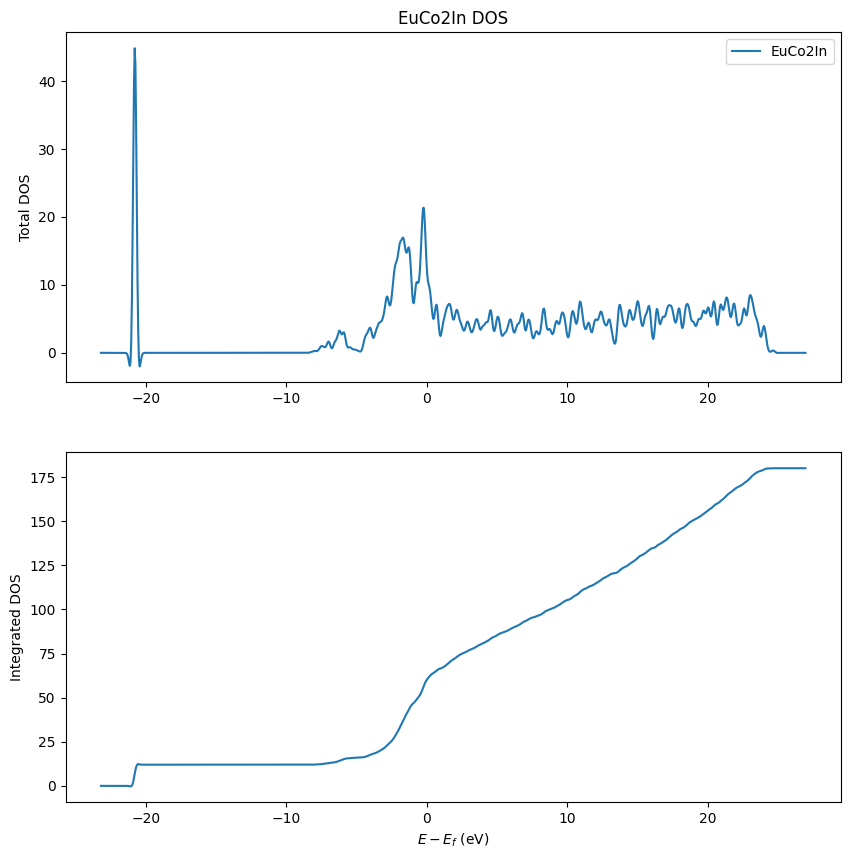


# Filename: DOSCAR
# Folder: NdCo2In
# Max Energy: 33.0197 eV
# Min Energy: -34.2015 eV
# Fermi Energy: 6.2854 eV
# 1001 points calculated



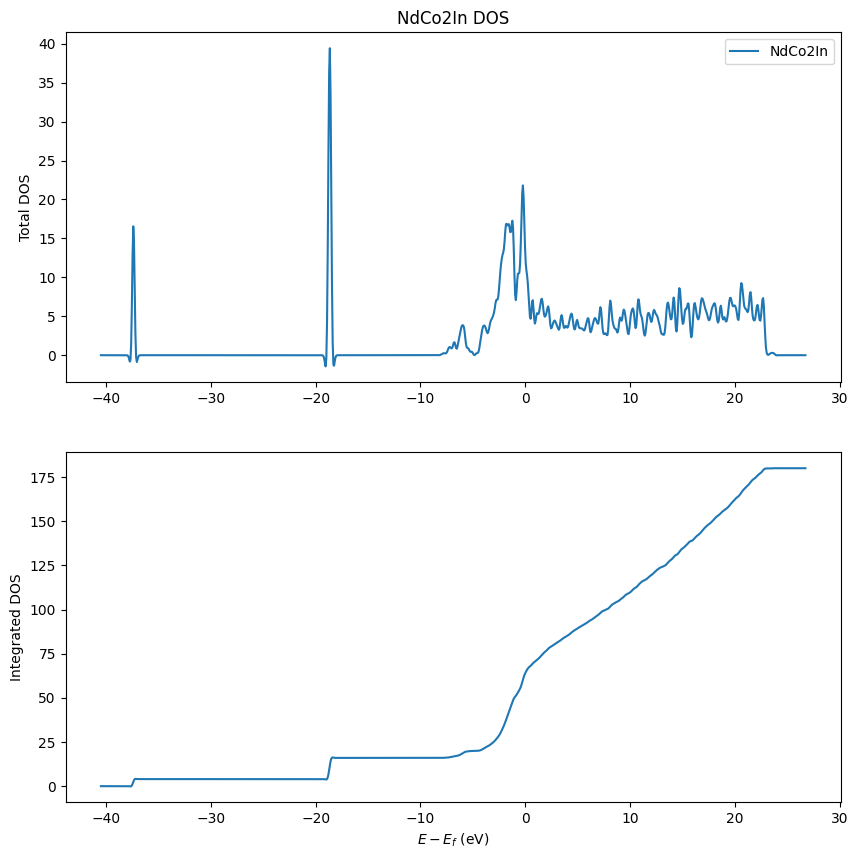


# Filename: DOSCAR
# Folder: TbCo2In
# Max Energy: 32.9366 eV
# Min Energy: -18.1846 eV
# Fermi Energy: 6.4208 eV
# 1001 points calculated



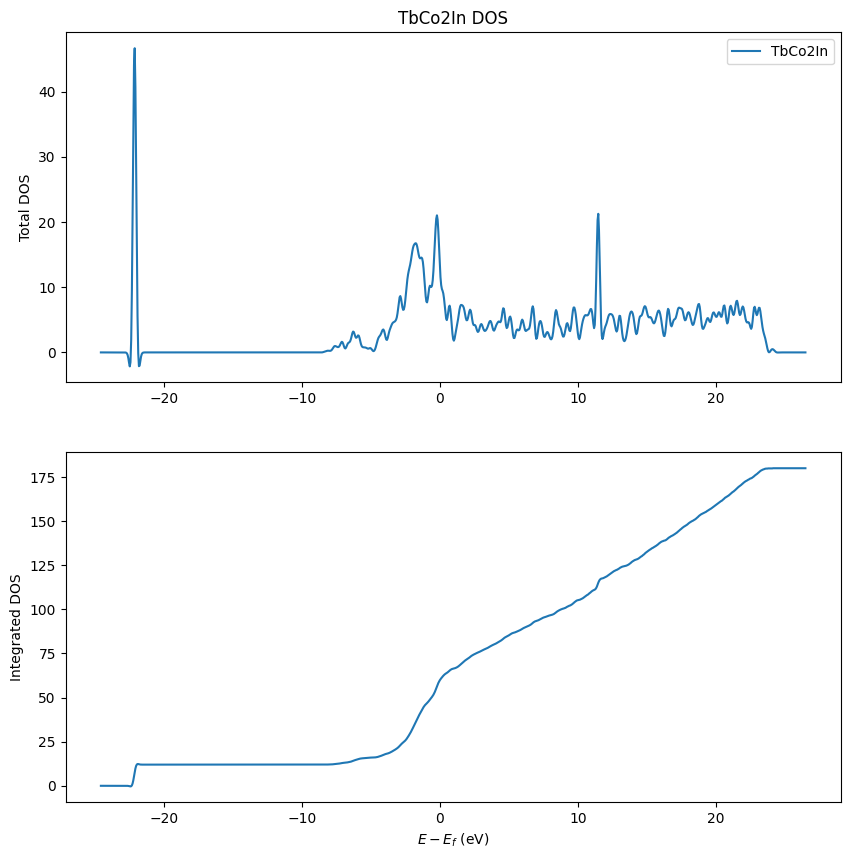


# Filename: DOSCAR
# Folder: ErCo2In
# Max Energy: 28.9201 eV
# Min Energy: -45.7017 eV
# Fermi Energy: 6.0301 eV
# 1001 points calculated



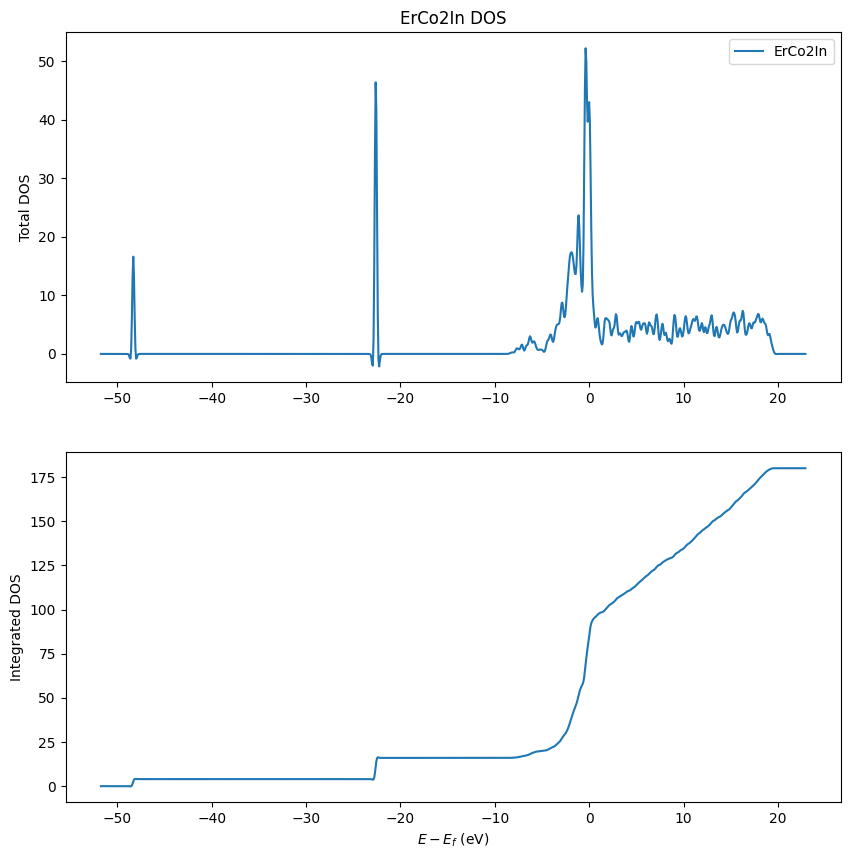


# Filename: DOSCAR
# Folder: HoCo2In
# Max Energy: 28.8198 eV
# Min Energy: -44.1221 eV
# Fermi Energy: 5.9788 eV
# 1001 points calculated



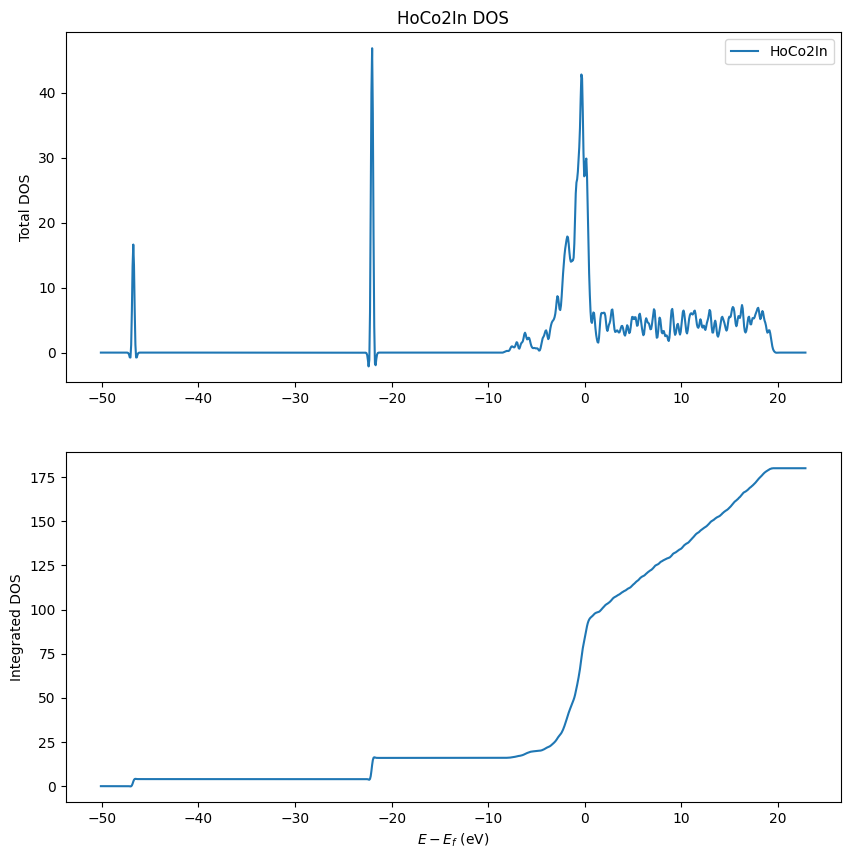


# Filename: DOSCAR
# Folder: DyCo2In
# Max Energy: 33.0318 eV
# Min Energy: -18.9277 eV
# Fermi Energy: 6.4100 eV
# 1001 points calculated



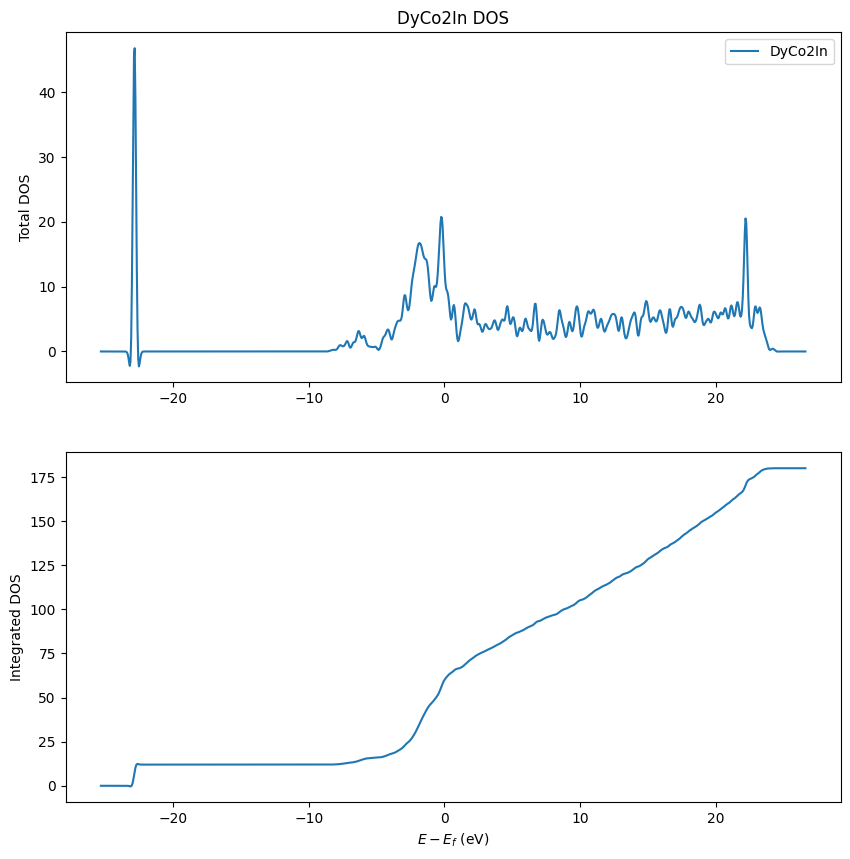

In [147]:
import os
import glob
import matplotlib.pyplot as plt

def readDOSCAR(filename, folder_name):
    doscar = open(filename, "r")

    doscar.readline()  # Skip file header
    doscar.readline()
    doscar.readline()
    doscar.readline()

    name = doscar.readline().rstrip()

    first = doscar.readline()
    (emax, emin, ndos, efermi, weight) = first.split()

    es = []
    tds = []
    ids = []

    print("# Filename:", os.path.basename(filename))
    print("# Folder:", folder_name)
    print("# Max Energy: %.4f eV" % float(emax))
    print("# Min Energy: %.4f eV" % float(emin))
    print("# Fermi Energy: %.4f eV" % float(efermi))
    print("#", ndos, "points calculated")
    print()

    for i in range(int(ndos)):
        line = doscar.readline()
        (energy, tdos, idos) = line.split()

        try:
            energy = float(energy)
            tdos = float(tdos)
            idos = float(idos)
        except ValueError:
            continue

        tds.append(tdos)
        es.append(energy - float(efermi))
        ids.append(idos)

    plt.figure(figsize=(10, 10))  # Adjust figure size as needed

    plt.subplot(2, 1, 1)
    plt.plot(es, tds, '-', label=folder_name)  # Use folder name as the label
    plt.ylabel('Total DOS')

    plt.subplot(2, 1, 2)
    plt.plot(es, ids, '-')
    plt.ylabel('Integrated DOS')

    plt.xlabel(r'$E - E_f$ (eV)')
    plt.subplot(2, 1, 1)
    plt.title(folder_name + " DOS")
    plt.legend()

    # Save the plot as PNG based on folder name
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Molecules/Graphs/DOS', folder_name + ".png")
    plt.savefig(output_filename)
    plt.show()  # Display the plot
    plt.close()  # Close the figure to free up memory

def main(directory):

    # Use glob to find all files ending with "DOSCAR" in the specified directory
    doscar_files = glob.glob(os.path.join(directory, '**', '*DOSCAR'), recursive=True)
    doscar_files = [f for f in doscar_files if "ispin=2" not in f and "Not_Using" not in f]

    if not doscar_files:
        print("No DOSCAR files found in the specified directory or its subdirectories.")
        return

    for filename in doscar_files:
        folder_name = os.path.basename(os.path.dirname(filename))  # Extract parent folder name
        readDOSCAR(filename, folder_name)
        print()  # Add an empty line between each block of information

# Example usage:
main('Desktop/Molecules')  # Adjust directory as needed

All ISPIN = 2 displayed:

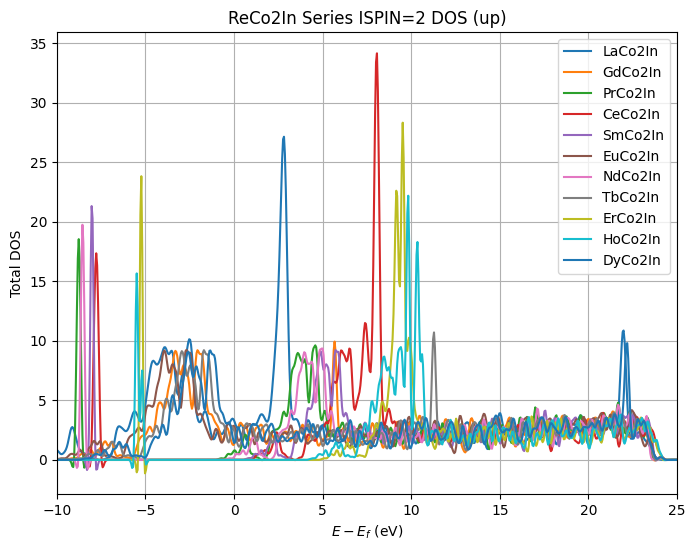

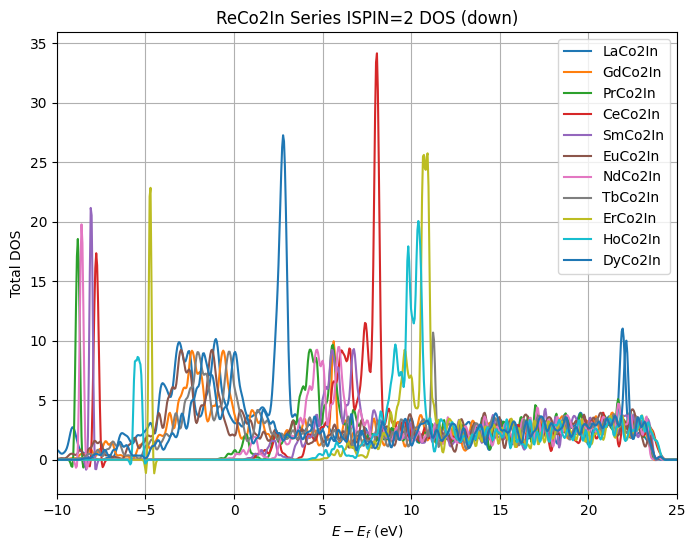

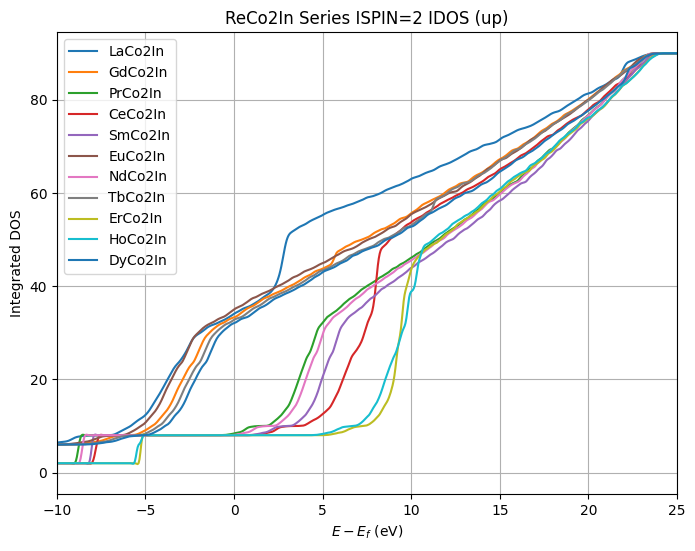

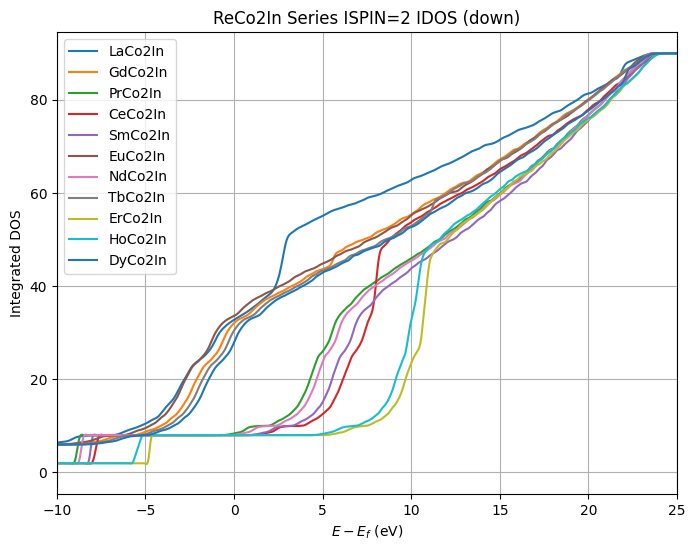

In [150]:
import os
import glob
import matplotlib.pyplot as plt

def readDOSCAR(filename, folder_name, all_tds_up, all_tds_down, all_ids_up, all_ids_down, parent_folder):
    doscar = open(filename, "r")

    doscar.readline()  # Skip file header
    doscar.readline()
    doscar.readline()
    doscar.readline()

    doscar.readline()  # Skip system name

    first = doscar.readline()
    (emax, emin, ndos, efermi, weight) = first.split()

    es = []
    tds_up = []
    tds_down = []
    ids_up = []
    ids_down = []

    for i in range(int(ndos)):
        line = doscar.readline()
        (energy, tdos_up, tdos_down, idos_up, idos_down) = line.split()

        try:
            energy = float(energy)
            tdos_up = float(tdos_up)
            tdos_down = float(tdos_down)
            idos_up = float(idos_up)
            idos_down = float(idos_down)
        except ValueError:
            continue

        es.append(energy - float(efermi))
        tds_up.append(tdos_up)
        tds_down.append(tdos_down)
        ids_up.append(idos_up)
        ids_down.append(idos_down)

    all_tds_up.append(tds_up)
    all_tds_down.append(tds_down)
    all_ids_up.append(ids_up)
    all_ids_down.append(ids_down)

    return es, parent_folder

def plot_combined_graph(es, all_data, ylabel, title, legend_labels, filename):
    plt.figure(figsize=(8, 6))

    for i, data in enumerate(all_data):
        plt.plot(es, data, label=legend_labels[i])

    plt.xlabel(r'$E - E_f$ (eV)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 25)
    plt.savefig(filename)
    plt.show()
    plt.close()

def main(directory):
    all_tds_up = []
    all_tds_down = []
    all_ids_up = []
    all_ids_down = []
    all_legend_labels = []

    # Use glob to find all files ending with "DOSCAR" in the specified directory
    doscar_files = glob.glob(os.path.join(directory, '**', '*DOSCAR'), recursive=True)
    doscar_files = [f for f in doscar_files if "ispin=2" in f and "Not_Using" not in f]

    if not doscar_files:
        print("No DOSCAR files found in the specified directory or its subdirectories.")
        return

    for filename in doscar_files:
        folder_name = os.path.basename(os.path.dirname(filename))  # Extract parent folder name
        parent_folder = os.path.basename(os.path.dirname(os.path.dirname(filename)))  # Extract parent folder of ispin=2 directory
        all_legend_labels.append(parent_folder)
        es, _ = readDOSCAR(filename, folder_name, all_tds_up, all_tds_down, all_ids_up, all_ids_down, parent_folder)

    # Plot combined graphs for DOS (up), DOS (down), IDOS (up), and IDOS (down)
    plot_combined_graph(es, all_tds_up, 'Total DOS', 'ReCo2In Series ISPIN=2 DOS (up)', all_legend_labels, 'Desktop/Molecules/Graphs/ISPIN=2/combined_DOS_up.png')
    plot_combined_graph(es, all_tds_down, 'Total DOS', 'ReCo2In Series ISPIN=2 DOS (down)', all_legend_labels, 'Desktop/Molecules/Graphs/ISPIN=2/combined_DOS_down.png')
    plot_combined_graph(es, all_ids_up, 'Integrated DOS', 'ReCo2In Series ISPIN=2 IDOS (up)', all_legend_labels, 'Desktop/Molecules/Graphs/ISPIN=2/combined_IDOS_up.png')
    plot_combined_graph(es, all_ids_down, 'Integrated DOS', 'ReCo2In Series ISPIN=2 IDOS (down)', all_legend_labels, 'Desktop/Molecules/Graphs/ISPIN=2/combined_IDOS_down.png')

main('Desktop/Molecules')

DOS and IDOS spin up and down for each molecule:

# Filename: DOSCAR
# Folder: LaCo2In
# Max Energy: 26.2395 eV
# Min Energy: -12.8795 eV
# Fermi Energy: 5.4587 eV
# 1001 points calculated



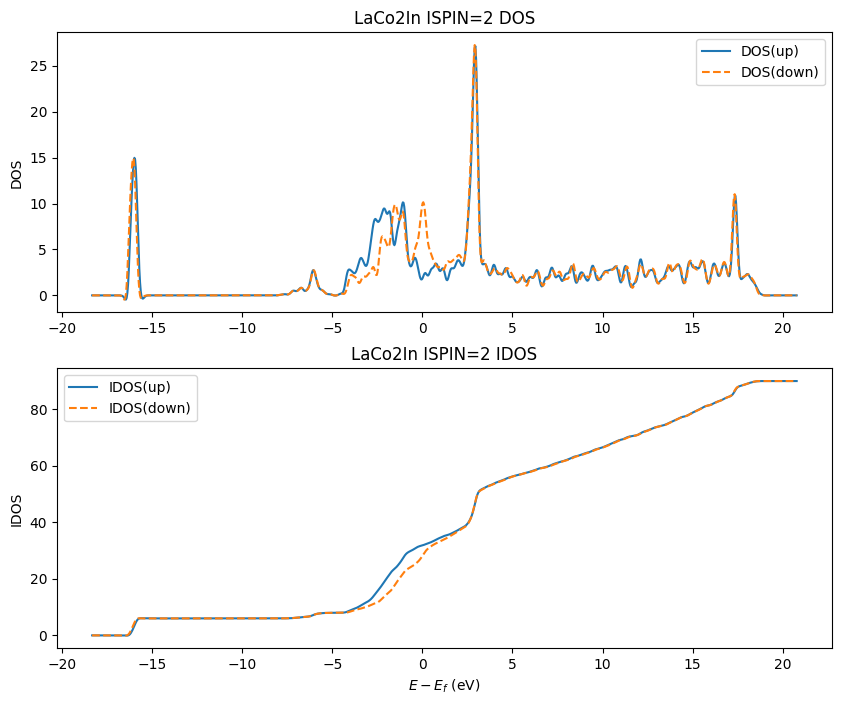


# Filename: DOSCAR
# Folder: GdCo2In
# Max Energy: 32.8516 eV
# Min Energy: -17.4464 eV
# Fermi Energy: 6.5440 eV
# 1001 points calculated



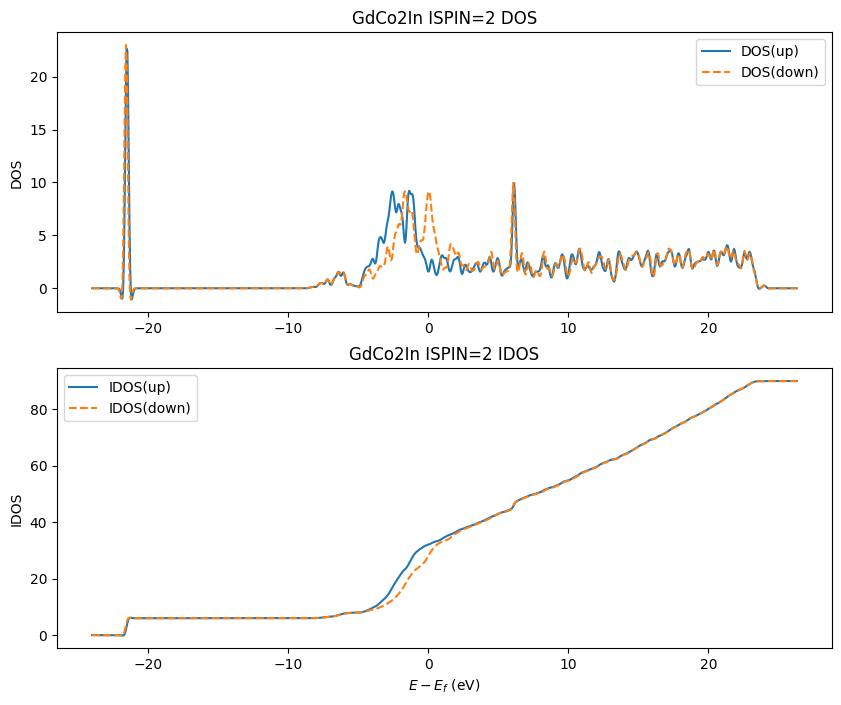


# Filename: DOSCAR
# Folder: PrCo2In
# Max Energy: 32.8072 eV
# Min Energy: -32.5014 eV
# Fermi Energy: 6.4172 eV
# 1001 points calculated



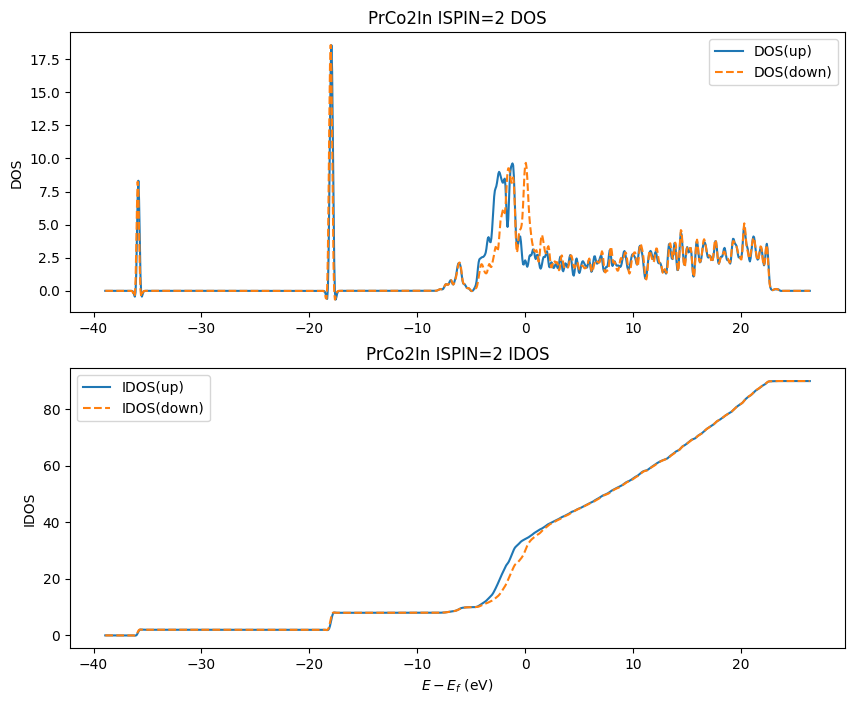


# Filename: DOSCAR
# Folder: CeCo2In
# Max Energy: 28.7545 eV
# Min Energy: -29.6541 eV
# Fermi Energy: 7.5281 eV
# 1001 points calculated



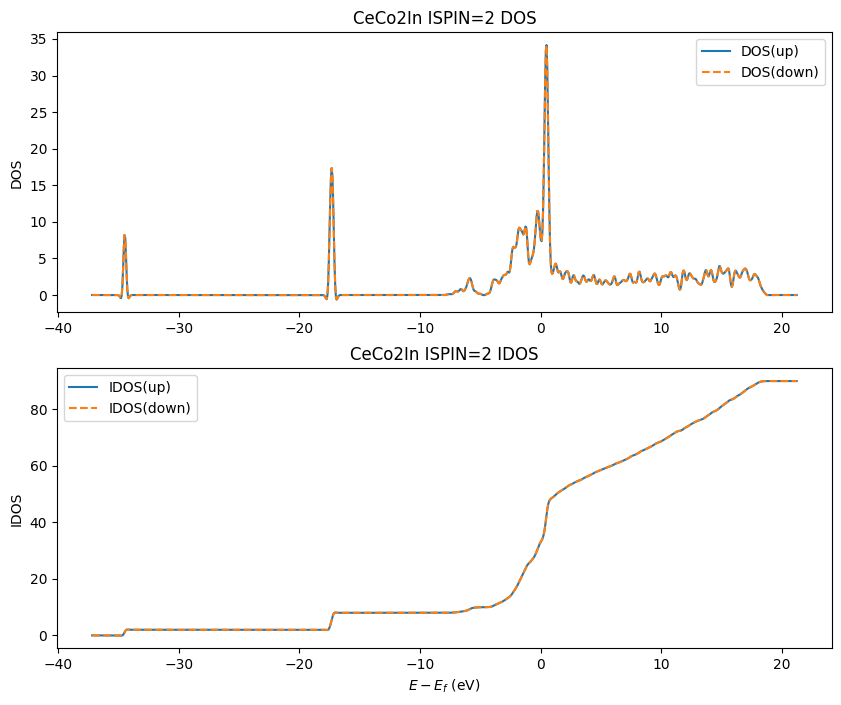


# Filename: DOSCAR
# Folder: SmCo2In
# Max Energy: 33.3702 eV
# Min Energy: -37.5557 eV
# Fermi Energy: 6.3349 eV
# 1001 points calculated



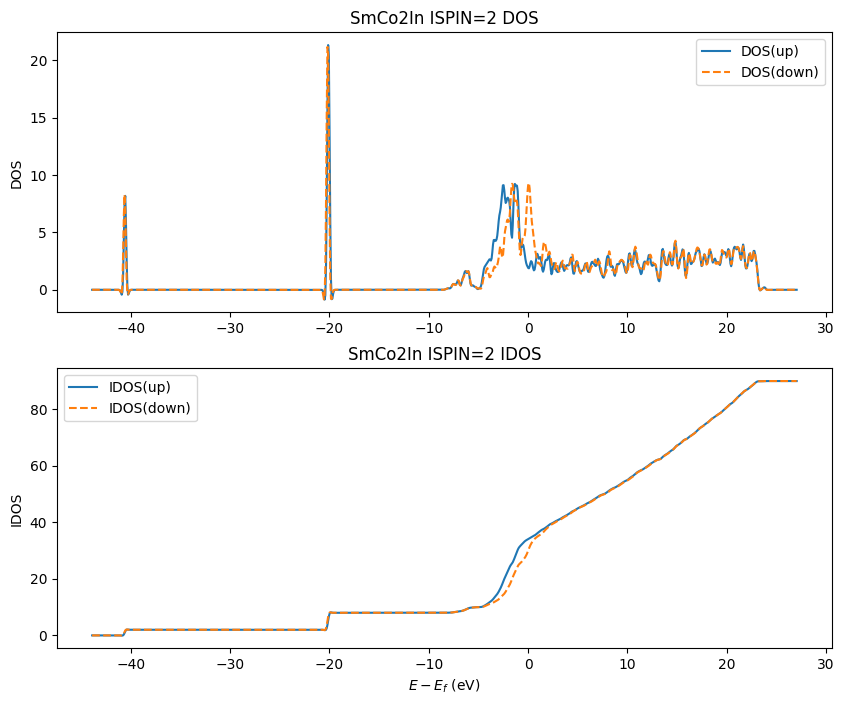


# Filename: DOSCAR
# Folder: EuCo2In
# Max Energy: 33.1936 eV
# Min Energy: -16.9458 eV
# Fermi Energy: 6.3533 eV
# 1001 points calculated



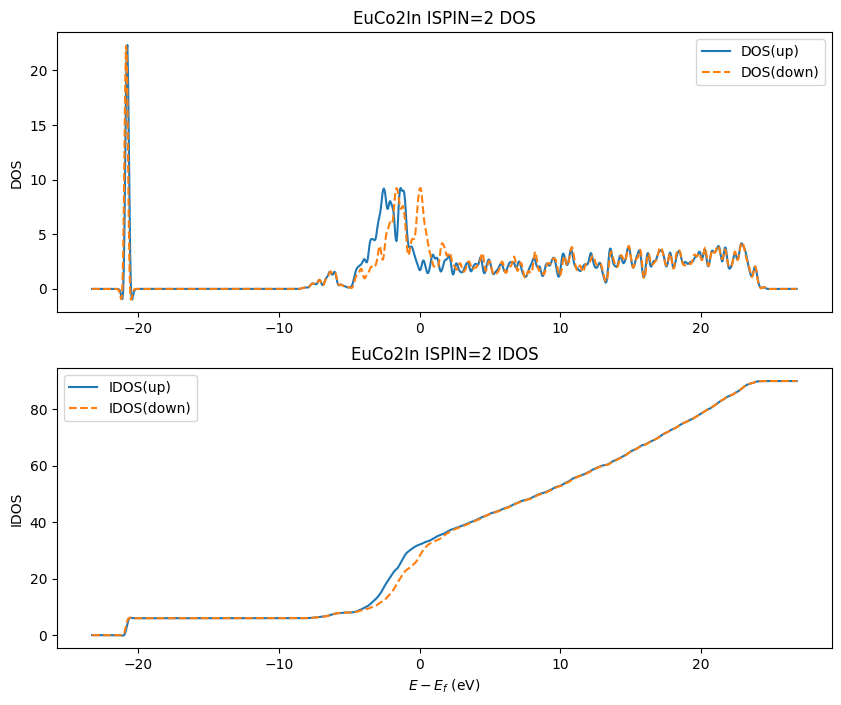


# Filename: DOSCAR
# Folder: NdCo2In
# Max Energy: 33.1633 eV
# Min Energy: -34.1618 eV
# Fermi Energy: 6.4111 eV
# 1001 points calculated



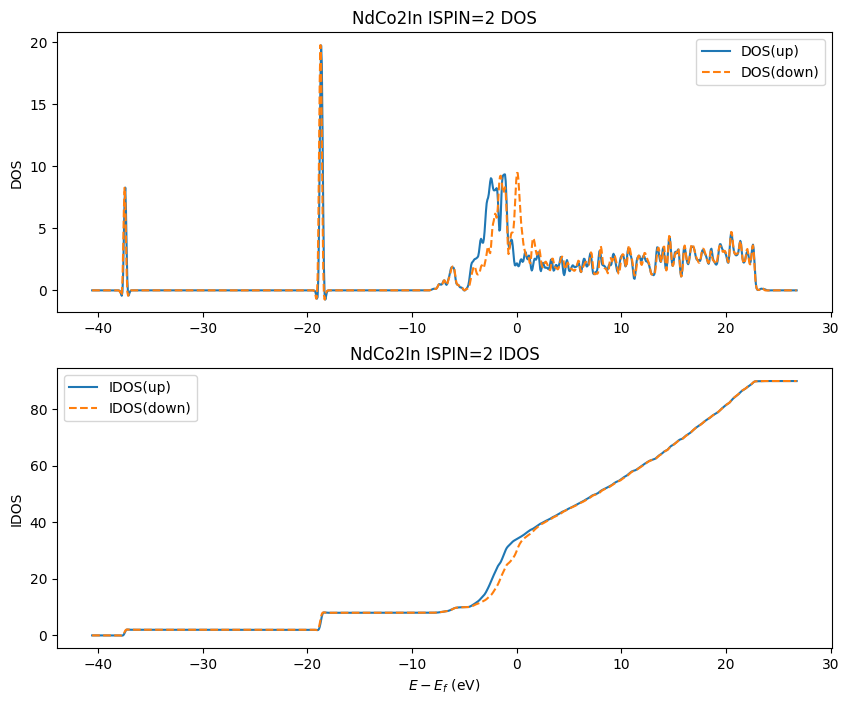


# Filename: DOSCAR
# Folder: TbCo2In
# Max Energy: 32.9587 eV
# Min Energy: -18.1636 eV
# Fermi Energy: 6.5516 eV
# 1001 points calculated



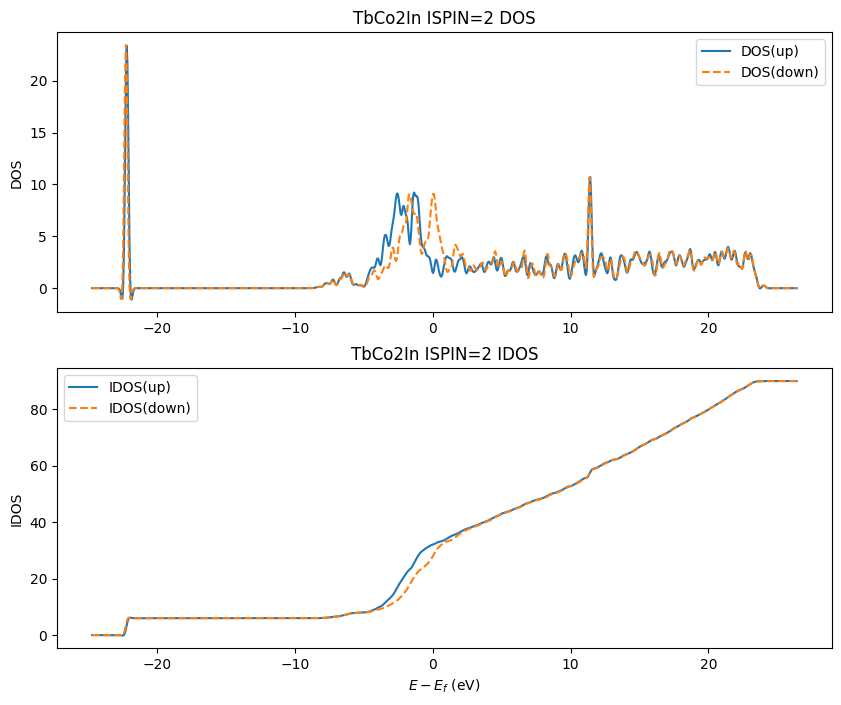


# Filename: DOSCAR
# Folder: ErCo2In
# Max Energy: 29.0426 eV
# Min Energy: -46.6174 eV
# Fermi Energy: 6.1955 eV
# 1001 points calculated



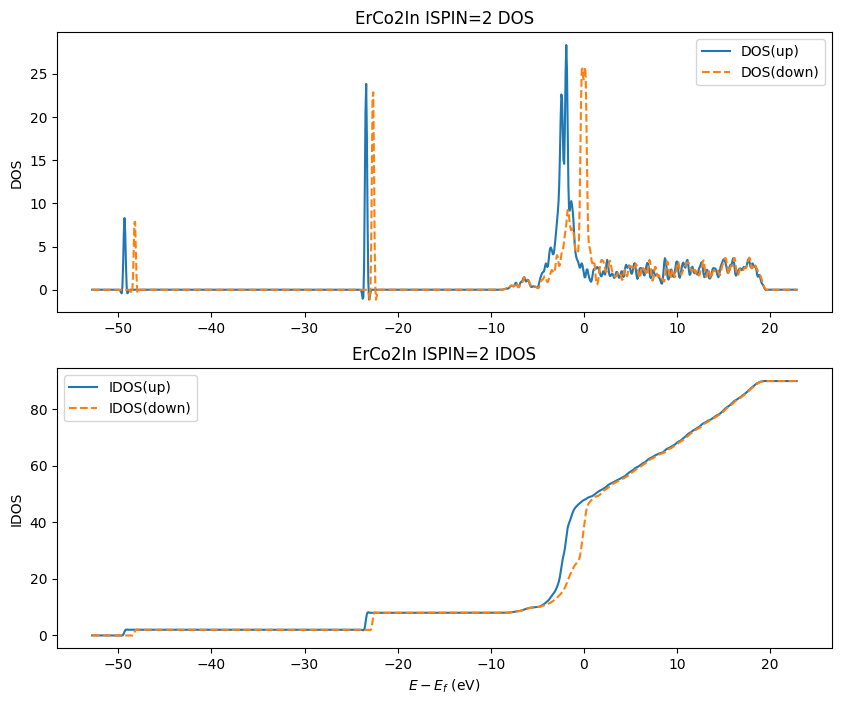


# Filename: DOSCAR
# Folder: HoCo2In
# Max Energy: 28.8146 eV
# Min Energy: -43.9585 eV
# Fermi Energy: 6.2035 eV
# 1001 points calculated



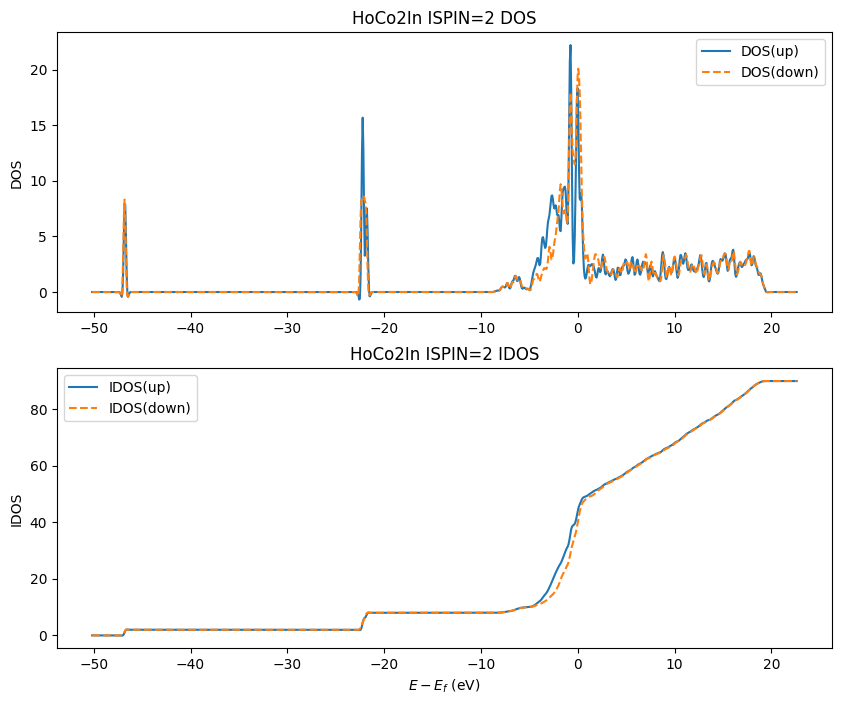


# Filename: DOSCAR
# Folder: DyCo2In
# Max Energy: 33.0516 eV
# Min Energy: -18.9047 eV
# Fermi Energy: 6.5399 eV
# 1001 points calculated



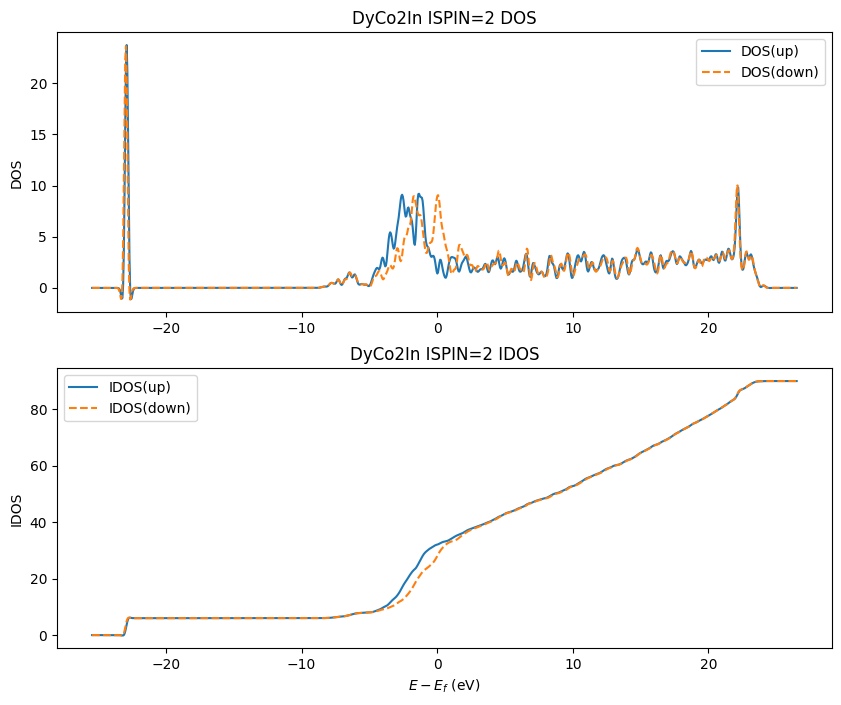

In [151]:
import os
import glob
import matplotlib.pyplot as plt

def readDOSCAR(filename, folder_name):
    doscar = open(filename, "r")

    doscar.readline()  # Skip file header
    doscar.readline()
    doscar.readline()
    doscar.readline()

    doscar.readline()  # Skip system name

    first = doscar.readline()
    (emax, emin, ndos, efermi, weight) = first.split()

    es = []
    tds_up = []
    tds_down = []
    ids_up = []
    ids_down = []

    print("# Filename:", os.path.basename(filename))
    print("# Folder:", folder_name)
    print("# Max Energy: %.4f eV" % float(emax))
    print("# Min Energy: %.4f eV" % float(emin))
    print("# Fermi Energy: %.4f eV" % float(efermi))
    print("#", ndos, "points calculated")
    print()

    for i in range(int(ndos)):
        line = doscar.readline()
        (energy, tdos_up, tdos_down, idos_up, idos_down) = line.split()

        try:
            energy = float(energy)
            tdos_up = float(tdos_up)
            tdos_down = float(tdos_down)
            idos_up = float(idos_up)
            idos_down = float(idos_down)
        except ValueError:
            continue

        es.append(energy - float(efermi))
        tds_up.append(tdos_up)
        tds_down.append(tdos_down)
        ids_up.append(idos_up)
        ids_down.append(idos_down)

    plt.figure(figsize=(10, 8))

    # Plot DOS(up) and DOS(down)
    plt.subplot(2, 1, 1)
    plt.plot(es, tds_up, '-', label='DOS(up)')  # Plot DOS(up)
    plt.plot(es, tds_down, '--', label='DOS(down)')  # Plot DOS(down)
    plt.ylabel('DOS')
    plt.title(folder_name + " ISPIN=2 DOS")  # Set title to molecule name
    plt.legend()

    # Plot IDOS(up) and IDOS(down)
    plt.subplot(2, 1, 2)
    plt.plot(es, ids_up, '-', label='IDOS(up)')  # Plot IDOS(up)
    plt.plot(es, ids_down, '--', label='IDOS(down)')  # Plot IDOS(down)
    plt.ylabel('IDOS')
    plt.xlabel(r'$E - E_f$ (eV)')
    plt.title(folder_name + " ISPIN=2 IDOS")  # Set title to molecule name
    plt.legend()

    # Save the plot as PNG based on folder name
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Molecules/Graphs/ISPIN=2', folder_name + ".png")
    plt.savefig(output_filename)
    plt.show()  # Display the plot
    plt.close()  # Close the figure to free up memory

def main(directory):

    # Use glob to find all files ending with "DOSCAR" in the specified directory
    doscar_files = glob.glob(os.path.join(directory, '**', '*DOSCAR'), recursive=True)
    doscar_files = [f for f in doscar_files if "ispin=2" in f and "Not_Using" not in f]

    if not doscar_files:
        print("No DOSCAR files found in the specified directory or its subdirectories.")
        return

    for filename in doscar_files:
        folder_name = os.path.basename(os.path.dirname(os.path.dirname(filename)))  # Extract parent folder name
        readDOSCAR(filename, folder_name)
        print()  # Add an empty line between each block of information

main('Desktop/Molecules')
